# Ejemplo de uso de obpsy para la obtención del scalograma de un sonido cardiaco

Mario Jojoa Acosta
mariojojoa@deusto.es
17 - oct - 2020

In [61]:
#@mario jojoa
##mariojojoa@deusto.es
#_______________________
### se cargan los paquetes para el funcionamiento del script#####
import numpy as np
import matplotlib.pyplot as plt
import obspy
from obspy.imaging.cm import obspy_sequential
from obspy.signal.tf_misfit import cwt
from obspy import read




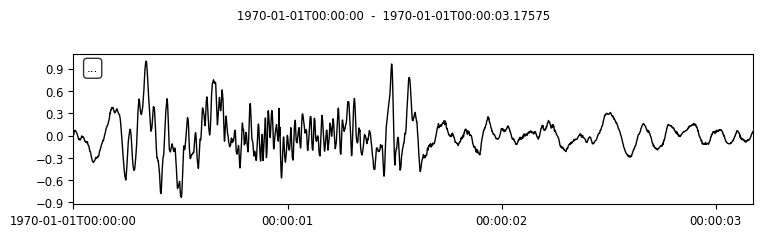

In [57]:
####se carga la señal de audio para calcular el scalograma####
st = read("a_m1.wav") # es importante que el archivo se encuentre en la misma carpeta que este notebook
st.normalize()
y = st.plot()


In [58]:
# se obtienen los parámetros###
dt = st[0].stats.delta
npts = st[0].stats.npts

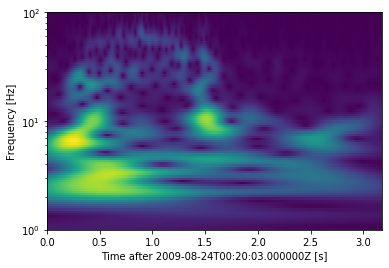

In [59]:
## se genera el scalograma###
t = np.linspace(0, dt * npts, npts)
f_min = 1
f_max = 100

scalogram = cwt(st[0].data, dt, 8, f_min, f_max)

fig = plt.figure()
ax = fig.add_subplot(111)

x, y = np.meshgrid(t,np.logspace(np.log10(f_min), np.log10(f_max), scalogram.shape[0]))

ax.pcolormesh(x, y, np.abs(scalogram), cmap=obspy_sequential)
ax.set_xlabel("Time after %s [s]" % tr.stats.starttime)
ax.set_ylabel("Frequency [Hz]")
ax.set_yscale('log')
ax.set_ylim(f_min, f_max)
plt.show()

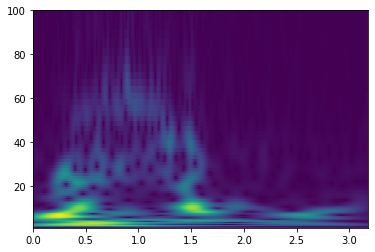

In [60]:
## se genera el scalograma###
t = np.linspace(0, dt * npts, npts)
f_min = 1
f_max = 100

scalogram = cwt(st[0].data, dt, 8, f_min, f_max)

fig = plt.figure()
ax = fig.add_subplot(111)

x, y = np.meshgrid(t,np.logspace(np.log10(f_min), np.log10(f_max), scalogram.shape[0]))

ax.pcolormesh(x, y, np.abs(scalogram), cmap=obspy_sequential)
fig.savefig('Scalogram1.jpg') # se guarda en la misma carpeta que este notebook